<a href="https://colab.research.google.com/github/EBUSYGIN/ML-1/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [759]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


total_data = pd.read_csv('data.csv')

In [760]:
total_data = total_data.drop_duplicates()
total_data

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8,14,2,69.7,...,-1,38 м²,"10,5 м²",79672094035,-1,NaN,Юбилейная,6,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19,25,2,48.1,...,Чистовая,"22,7 м²","16,1 м²",74951370494,"2,62 м",NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,ID 47276638,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3,5,2,45.0,...,-1,-1,6 м²,79153266030,-1,NaN,Юбилейная,11к3,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3,6,2,34.0,...,-1,19 м²,8 м²,79651097781,"2,75 м",NaN,бульвар Тенистый,5,Медведково,Императорские Мытищи


In [761]:
total_data['house_material_type'].value_counts()

,count
house_material_type,
-1,6190
Монолитно-кирпичный,478
Монолитный,443
"Монолитно-кирпичный, монолитный",216
Панельный,107
"Панельный, монолитный",54
Кирпичный,27
"Монолитно-кирпичный, монолитный, кирпичный",26
"Монолитно-кирпичный, кирпичный",14


In [762]:
df = total_data.drop(['author_type', 'url', 'phone', 'house_number', 'residential_complex', 'street', 'author', 'deal_type', 'house_material_type', 'accommodation_type'], axis=1)
#Удаляем ненужные, по моему мнению колонки
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,-1,18 м²,1 м²,3 м,Серпухов,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,-1,18 м²,6 м²,"2,7 м",NaN,Аннино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,-1,Красный Текстильщик мкр,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,-1,20 м²,5 м²,"3,5 м",Серпухов,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000,2018,Вторичка,-1,-1,-1,-1,38 м²,"10,5 м²",-1,NaN,Медведково
8389,Мытищи,19,25,2,48.1,8607014,2025,Новостройка,-1,Открытая,-1,Чистовая,"22,7 м²","16,1 м²","2,62 м",NaN,Ростокино
8390,Мытищи,3,5,2,45.0,7300000,1968,Вторичка,1 балкон,-1,-1,-1,-1,6 м²,-1,NaN,Медведково
8391,Мытищи,3,6,2,34.0,6400000,2023,Вторичка,1 балкон,Открытая,-1,-1,19 м²,8 м²,"2,75 м",NaN,Медведково


In [763]:
# from google.colab import files
# total.to_csv("total.csv", index=False)
# files.download("total.csv")

df = df.dropna(how='all')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7562 entries, 0 to 8392
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7562 non-null   object 
 1   floor                 7562 non-null   object 
 2   floors_count          7562 non-null   object 
 3   rooms_count           7562 non-null   object 
 4   total_meters          7562 non-null   object 
 5   price                 7562 non-null   float64
 6   year_of_construction  7562 non-null   object 
 7   object_type           7562 non-null   object 
 8   have_loggia           7562 non-null   object 
 9   parking_type          7562 non-null   object 
 10  heating_type          7562 non-null   object 
 11  finish_type           7562 non-null   object 
 12  living_meters         7562 non-null   object 
 13  kitchen_meters        7562 non-null   object 
 14  ceiling_height        7562 non-null   object 
 15  district              2982

<ipython-input-763-206a14cfb36d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [764]:

null_counts_cian = df.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

                  Column  Null Count
0               location           0
1                  floor           0
2           floors_count           0
3            rooms_count           0
4           total_meters           0
5                  price           0
6   year_of_construction           0
7            object_type           0
8            have_loggia           0
9           parking_type           0
10          heating_type           0
11           finish_type           0
12         living_meters           0
13        kitchen_meters           0
14        ceiling_height           0
15              district        4580
16           underground        2276


<Axes: >

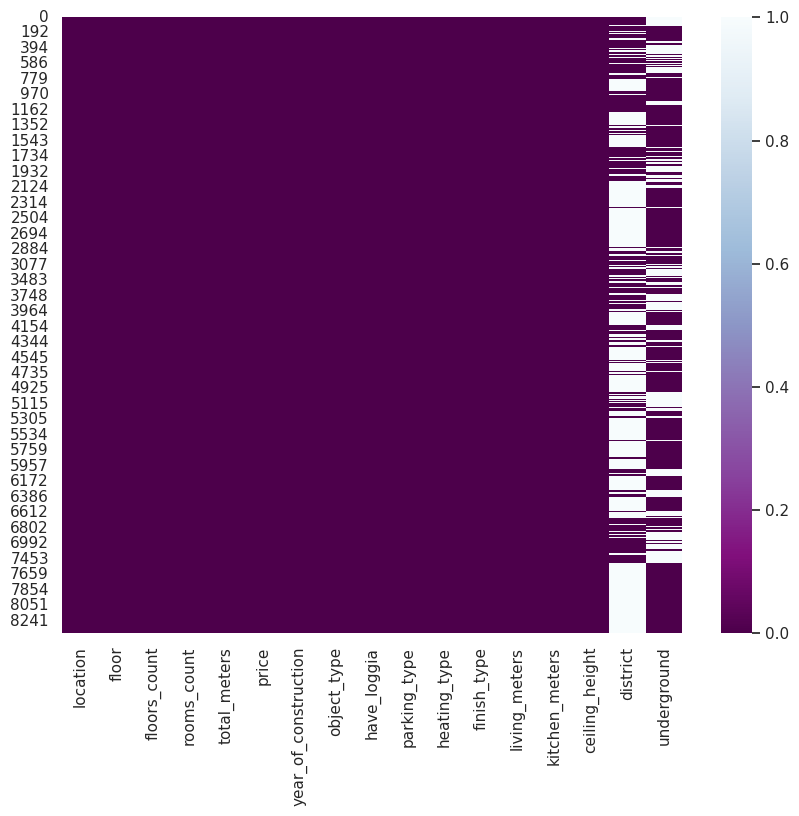

In [765]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='BuPu_r')

In [766]:

def convert_to_numeric_with_zero(series):
    def clean_and_convert(value):
        if isinstance(value, str):
            # Заменяем запятую на точку и удаляем все символы, кроме цифр, точки и минуса
            cleaned_value = re.sub(r'[^0-9.-]', '', value.replace(',', '.'))
            try:
                return float(cleaned_value)
            except ValueError:
                return 0
        return value

    return series.apply(clean_and_convert)

# Применение функции к определенному столбцу
columns_to_convert = df.columns
print(columns_to_convert)

for col in ['floor', 'floors_count',
       'rooms_count', 'total_meters', 'price', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'ceiling_height',
]:
    df[col] = convert_to_numeric_with_zero(df[col])


# Список колонок, которые нужно преобразовать
columns_to_convert = ['floor', 'floors_count', 'rooms_count', 'year_of_construction']

# Преобразование float в int для указанных колонок
def safe_float_to_int(value):
    try:
        return int(float(value))
    except (ValueError, TypeError):

        return 0

# Применение функции к указанным колонкам
for column in columns_to_convert:
    df[column] = df[column].apply(safe_float_to_int)

df

Index(['location', 'floor', 'floors_count', 'rooms_count', 'total_meters',
       'price', 'year_of_construction', 'object_type', 'have_loggia',
       'parking_type', 'heating_type', 'finish_type', 'living_meters',
       'kitchen_meters', 'ceiling_height', 'district', 'underground'],
      dtype='object')


,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,-1,Наземная,-1.0,-1.0,18.0,1.0,3.00,Серпухов,NaN
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,-1,-1,-1.0,-1.0,18.0,6.0,2.70,NaN,Аннино
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.00,Красный Текстильщик мкр,NaN
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.00,Серпухов,NaN
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,-1,Наземная,-1.0,-1.0,20.0,5.0,3.50,Серпухов,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,-1,-1,-1.0,-1.0,38.0,10.5,-1.00,NaN,Медведково
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,-1,Открытая,-1.0,0.0,22.7,16.1,2.62,NaN,Ростокино
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1 балкон,-1,-1.0,-1.0,-1.0,6.0,-1.00,NaN,Медведково
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1 балкон,Открытая,-1.0,-1.0,19.0,8.0,2.75,NaN,Медведково


In [767]:
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,-1,Наземная,-1.0,-1.0,18.0,1.0,3.00,Серпухов,NaN
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,-1,-1,-1.0,-1.0,18.0,6.0,2.70,NaN,Аннино
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.00,Красный Текстильщик мкр,NaN
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.00,Серпухов,NaN
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,-1,Наземная,-1.0,-1.0,20.0,5.0,3.50,Серпухов,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,-1,-1,-1.0,-1.0,38.0,10.5,-1.00,NaN,Медведково
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,-1,Открытая,-1.0,0.0,22.7,16.1,2.62,NaN,Ростокино
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1 балкон,-1,-1.0,-1.0,-1.0,6.0,-1.00,NaN,Медведково
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1 балкон,Открытая,-1.0,-1.0,19.0,8.0,2.75,NaN,Медведково


In [768]:
df['price_meter'] = df['price'] / df['total_meters']
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground,price_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,-1,Наземная,-1.0,-1.0,18.0,1.0,3.0,Серпухов,NaN,113526.570048
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,-1,-1,-1.0,-1.0,18.0,6.0,2.7,NaN,Аннино,125757.575758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,Красный Текстильщик мкр,NaN,121428.571429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,Серпухов,NaN,142857.142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,-1,Наземная,-1.0,-1.0,20.0,5.0,3.5,Серпухов,NaN,115830.115830


In [769]:
df['heating_type'].value_counts()

,count
heating_type,
-1.0,7562


In [770]:
df = df.drop(['heating_type'], axis=1)
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground,price_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,-1,Наземная,-1.0,18.0,1.0,3.00,Серпухов,NaN,113526.570048
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,-1,-1,-1.0,18.0,6.0,2.70,NaN,Аннино,125757.575758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.00,Красный Текстильщик мкр,NaN,121428.571429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,-1,-1,-1.0,-1.0,-1.0,-1.00,Серпухов,NaN,142857.142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,-1,Наземная,-1.0,20.0,5.0,3.50,Серпухов,NaN,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,-1,-1,-1.0,38.0,10.5,-1.00,NaN,Медведково,163558.106169
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,-1,Открытая,0.0,22.7,16.1,2.62,NaN,Ростокино,178940.000000
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1 балкон,-1,-1.0,-1.0,6.0,-1.00,NaN,Медведково,162222.222222
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1 балкон,Открытая,-1.0,19.0,8.0,2.75,NaN,Медведково,188235.294118


In [771]:
df['have_loggia'].value_counts()

,count
have_loggia,
-1,3229
1 лоджия,1933
1 балкон,1854
2 лоджии,195
"1 лоджия, 1 балкон",178
2 балкона,120
3 лоджии,18
3 балкона,12
"2 лоджии, 1 балкон",8


In [772]:
def convert_and_sum_balconies(text):
    # Регулярное выражение для поиска чисел и слов "лоджии" и "балкон"
    pattern = r'(\d+)\s*(лоджии|балкон)'

    # Ищем все совпадения в строке
    matches = re.findall(pattern, text)

    # Суммируем все найденные числа
    total = sum(int(match[0]) for match in matches)

    return total if total > 0 else 0

df['have_loggia'] = df['have_loggia'].apply(convert_and_sum_balconies)

df['have_loggia'].value_counts()

,count
have_loggia,
0,5162
1,2032
2,322
3,38
4,8


In [773]:
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground,price_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,0,Наземная,-1.0,18.0,1.0,3.00,Серпухов,NaN,113526.570048
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,0,-1,-1.0,18.0,6.0,2.70,NaN,Аннино,125757.575758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,0,-1,-1.0,-1.0,-1.0,-1.00,Красный Текстильщик мкр,NaN,121428.571429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,0,-1,-1.0,-1.0,-1.0,-1.00,Серпухов,NaN,142857.142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,0,Наземная,-1.0,20.0,5.0,3.50,Серпухов,NaN,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,0,-1,-1.0,38.0,10.5,-1.00,NaN,Медведково,163558.106169
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,0,Открытая,0.0,22.7,16.1,2.62,NaN,Ростокино,178940.000000
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1,-1,-1.0,-1.0,6.0,-1.00,NaN,Медведково,162222.222222
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1,Открытая,-1.0,19.0,8.0,2.75,NaN,Медведково,188235.294118


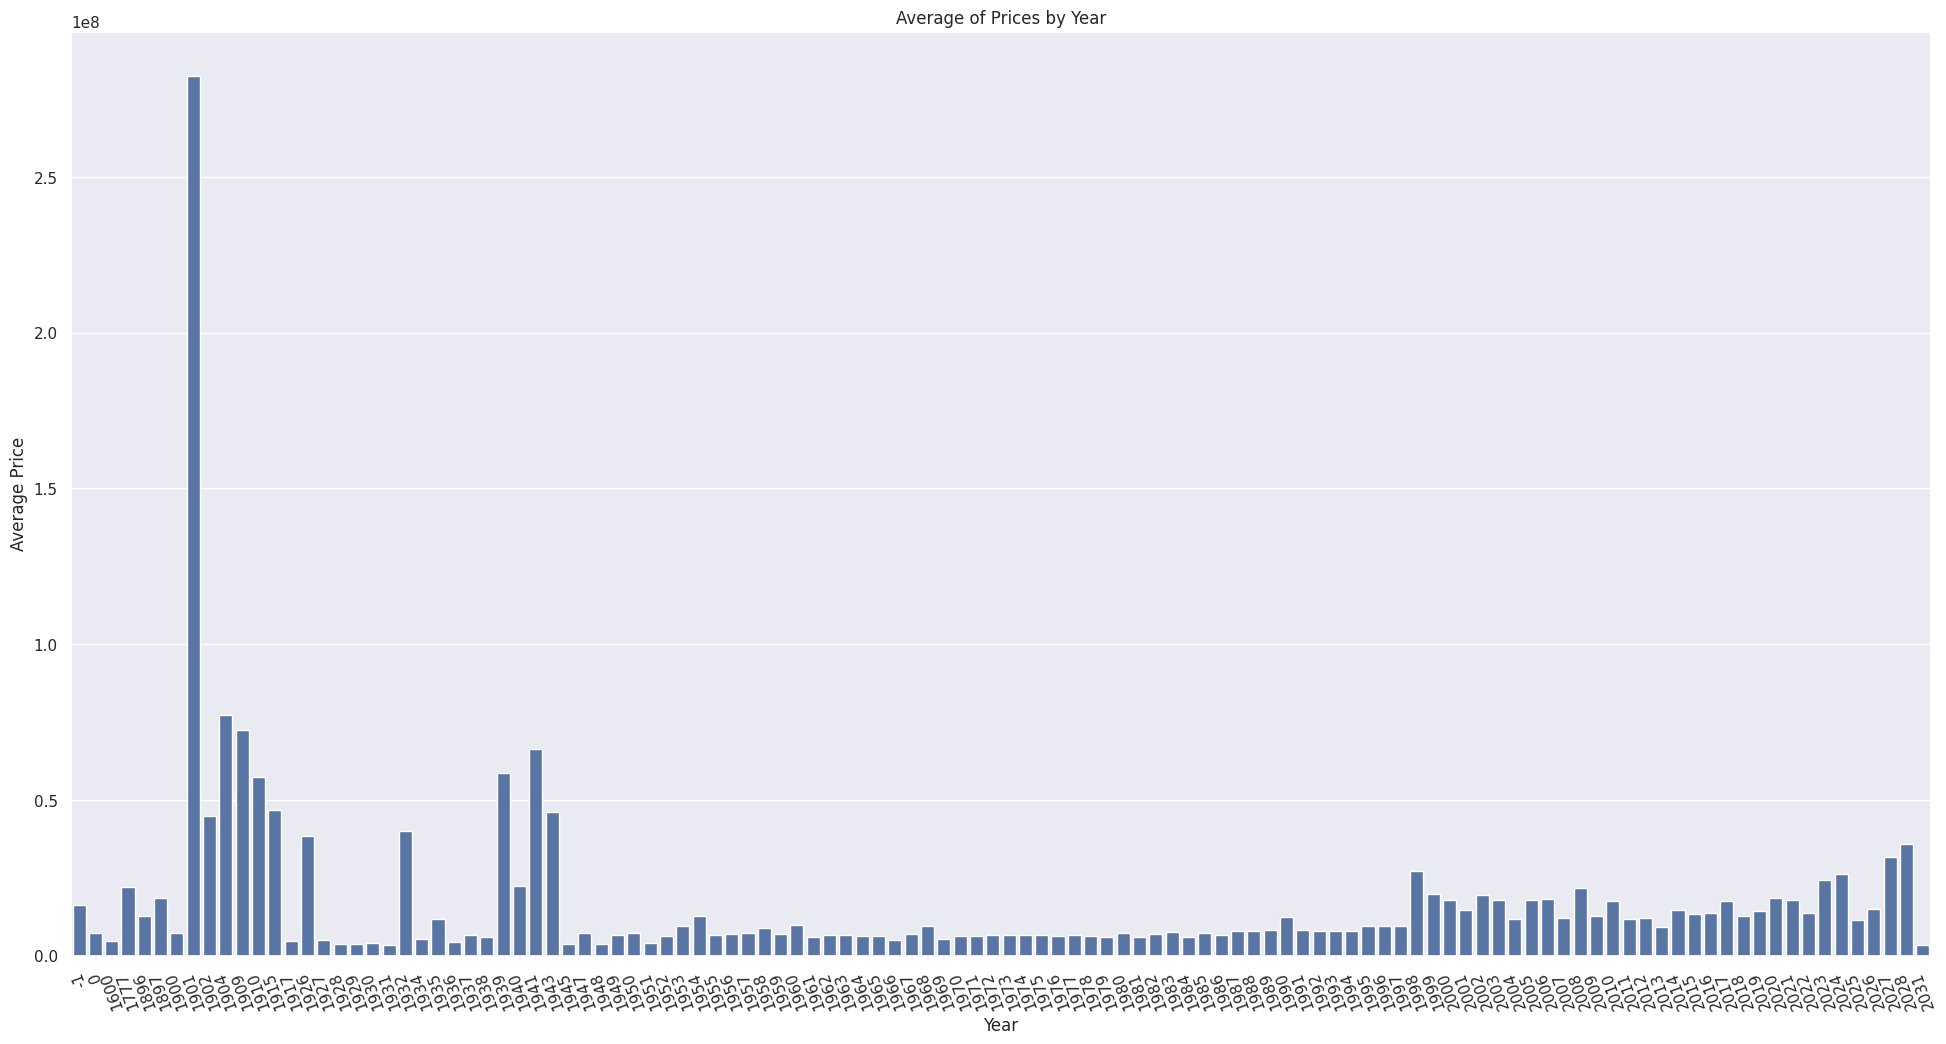

In [774]:
average_prices = df.groupby('year_of_construction')['price'].mean().reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=110)

plt.show()

In [775]:

df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,underground,price_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,0,Наземная,-1.0,18.0,1.0,3.00,Серпухов,NaN,113526.570048
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,0,-1,-1.0,18.0,6.0,2.70,NaN,Аннино,125757.575758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,0,-1,-1.0,-1.0,-1.0,-1.00,Красный Текстильщик мкр,NaN,121428.571429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,0,-1,-1.0,-1.0,-1.0,-1.00,Серпухов,NaN,142857.142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,0,Наземная,-1.0,20.0,5.0,3.50,Серпухов,NaN,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,0,-1,-1.0,38.0,10.5,-1.00,NaN,Медведково,163558.106169
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,0,Открытая,0.0,22.7,16.1,2.62,NaN,Ростокино,178940.000000
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1,-1,-1.0,-1.0,6.0,-1.00,NaN,Медведково,162222.222222
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1,Открытая,-1.0,19.0,8.0,2.75,NaN,Медведково,188235.294118


In [776]:
df['parking_type'].value_counts()

,count
parking_type,
-1,3324
Наземная,2819
Подземная,833
Открытая,453
Многоуровневая,133


In [777]:
df['parking_type'] = df['parking_type'].replace('-1', "Нет")
df['underground'] = df['underground'].replace(np.NaN, "Нет")
df['district'] = df['district'].replace(np.NaN, "Неопределен")
# df['parking_type'].value_counts()
# df['underground'].value_counts()
df['district'].value_counts()


,count
district,
Неопределен,4580
Дмитров,178
Клин,104
Пресненский,89
Волоколамск,68
...,...
Арзамас,1
Шумерля,1
мкр. Предместье Глазково,1


In [778]:
df = df.drop(['district'], axis=1)
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,finish_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,0,Наземная,-1.0,18.0,1.0,3.00,Нет,113526.570048
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,0,Нет,-1.0,18.0,6.0,2.70,Аннино,125757.575758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,0,Нет,-1.0,-1.0,-1.0,-1.00,Нет,121428.571429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,0,Нет,-1.0,-1.0,-1.0,-1.00,Нет,142857.142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,0,Наземная,-1.0,20.0,5.0,3.50,Нет,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,0,Нет,-1.0,38.0,10.5,-1.00,Медведково,163558.106169
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,0,Открытая,0.0,22.7,16.1,2.62,Ростокино,178940.000000
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1,Нет,-1.0,-1.0,6.0,-1.00,Медведково,162222.222222
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1,Открытая,-1.0,19.0,8.0,2.75,Медведково,188235.294118


In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7562 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7562 non-null   object 
 1   floor                 7562 non-null   int64  
 2   floors_count          7562 non-null   int64  
 3   rooms_count           7562 non-null   int64  
 4   total_meters          7562 non-null   float64
 5   price                 7562 non-null   float64
 6   year_of_construction  7562 non-null   int64  
 7   object_type           7562 non-null   object 
 8   have_loggia           7562 non-null   int64  
 9   parking_type          7562 non-null   object 
 10  finish_type           7562 non-null   float64
 11  living_meters         7562 non-null   float64
 12  kitchen_meters        7562 non-null   float64
 13  ceiling_height        7562 non-null   float64
 14  underground           7562 non-null   object 
 15  price_meter           7562

In [780]:
df['living_meters'] = df['living_meters'].replace(-1, 0)
df['kitchen_meters'] = df['kitchen_meters'].replace(-1, 0)
df['ceiling_height'] = df['ceiling_height'].replace(-1, 0)

# Функция для преобразования значений
def convert_value(value):
    if value == -1:
        return 0
    else:
        return 1

# Применение функции к колонке
# df['underground'] = df['underground'].apply(convert_value)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7562 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7562 non-null   object 
 1   floor                 7562 non-null   int64  
 2   floors_count          7562 non-null   int64  
 3   rooms_count           7562 non-null   int64  
 4   total_meters          7562 non-null   float64
 5   price                 7562 non-null   float64
 6   year_of_construction  7562 non-null   int64  
 7   object_type           7562 non-null   object 
 8   have_loggia           7562 non-null   int64  
 9   parking_type          7562 non-null   object 
 10  finish_type           7562 non-null   float64
 11  living_meters         7562 non-null   float64
 12  kitchen_meters        7562 non-null   float64
 13  ceiling_height        7562 non-null   float64
 14  underground           7562 non-null   object 
 15  price_meter           7562

<Axes: >

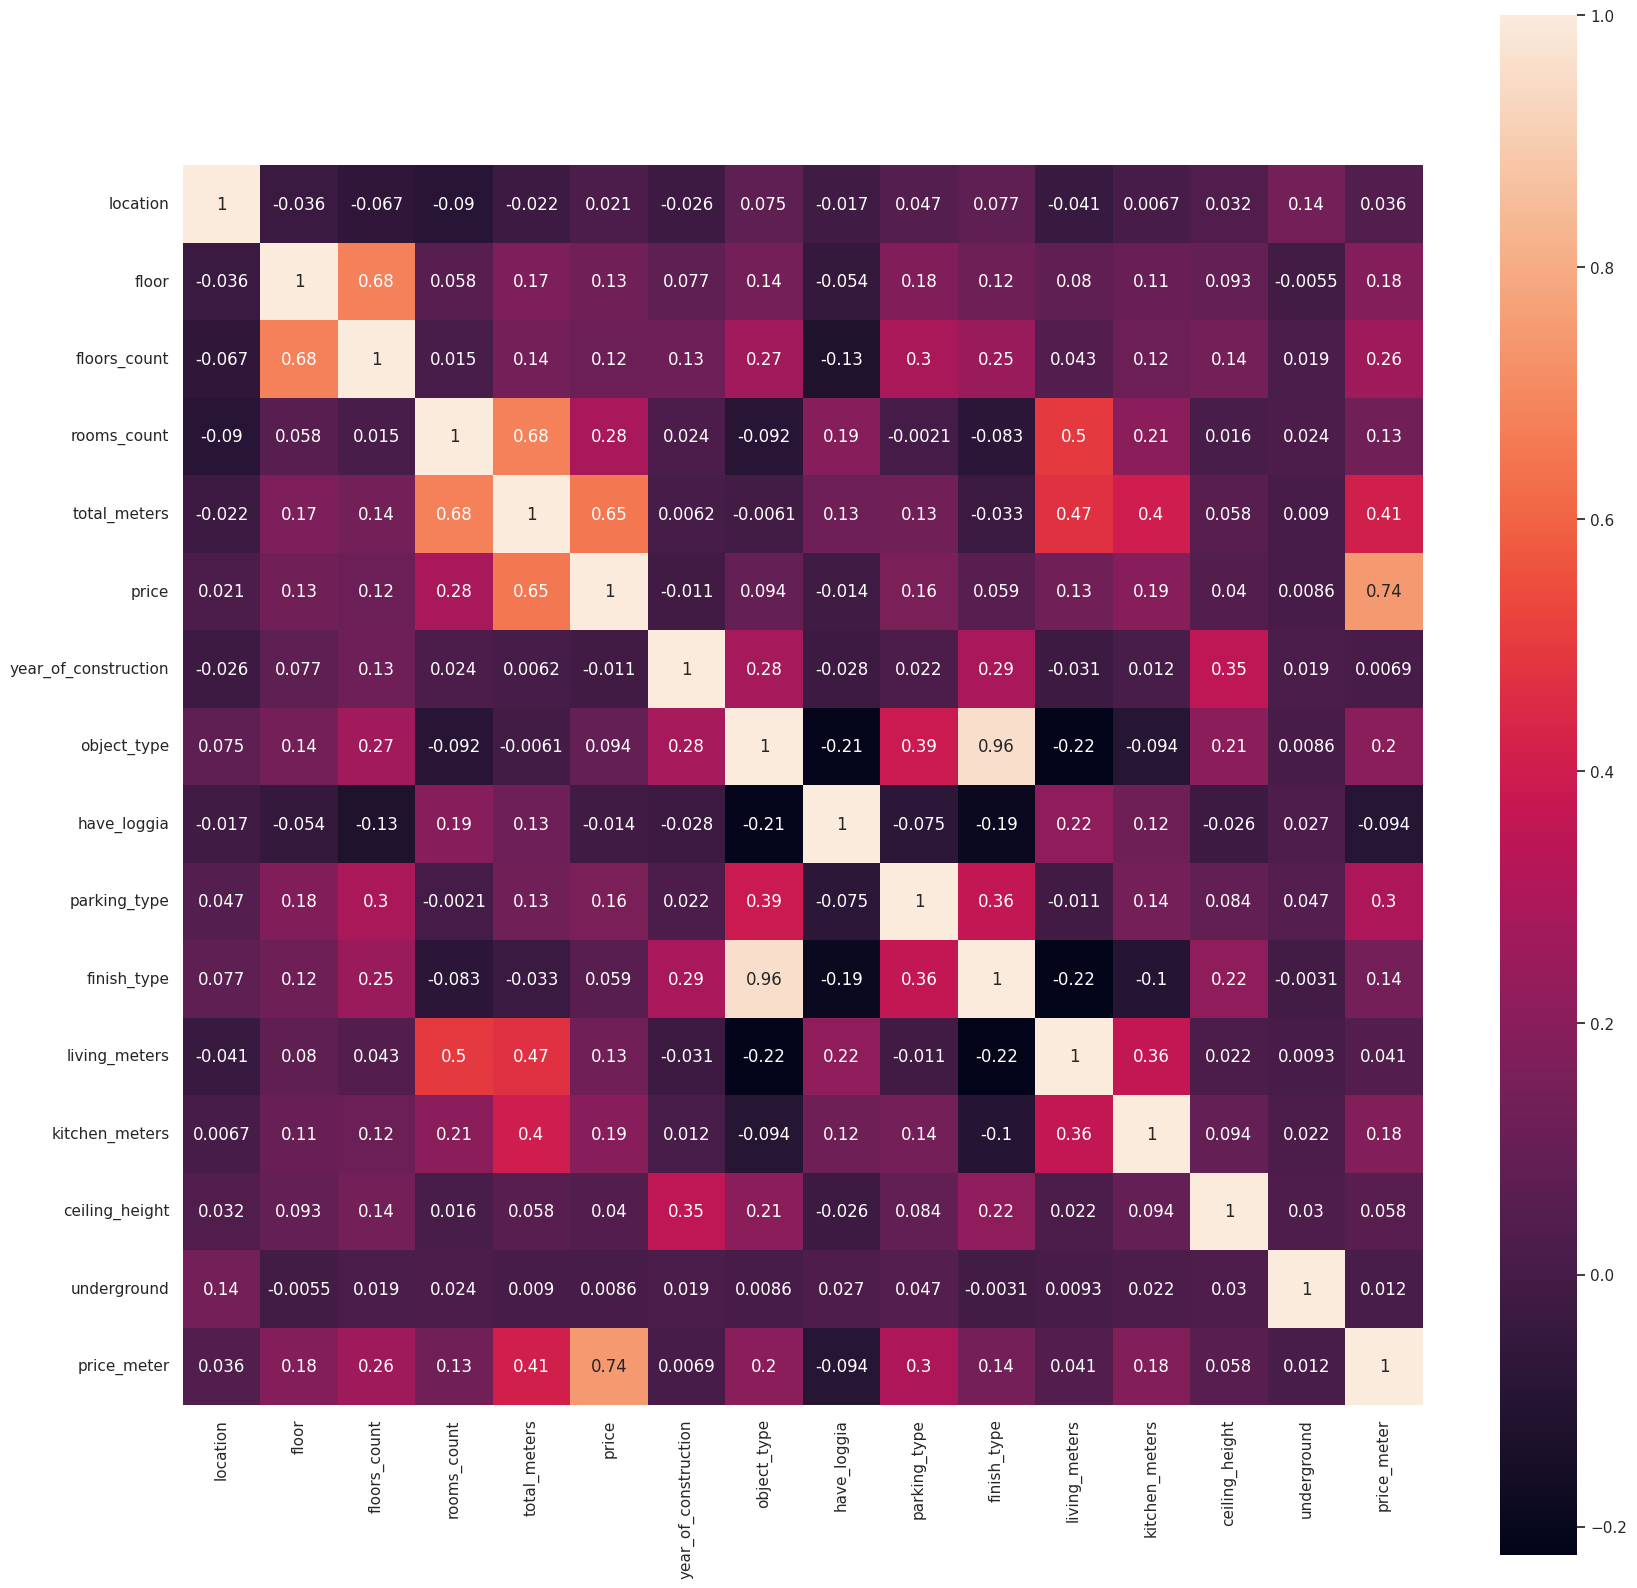

In [781]:
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy()  # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result[column].dtype == object:  # если тип столбца - строка, то нужно его закодировать
            # Преобразуем все значения в строки
            result[column] = result[column].astype(str)
            encoders[column] = preprocessing.LabelEncoder()  # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column])  # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

In [782]:
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,finish_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,0,Наземная,-1.0,18.0,1.0,3.00,Нет,113526.570048
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,0,Нет,-1.0,18.0,6.0,2.70,Аннино,125757.575758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,0,Нет,-1.0,0.0,0.0,0.00,Нет,121428.571429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,0,Нет,-1.0,0.0,0.0,0.00,Нет,142857.142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,0,Наземная,-1.0,20.0,5.0,3.50,Нет,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,0,Нет,-1.0,38.0,10.5,0.00,Медведково,163558.106169
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,0,Открытая,0.0,22.7,16.1,2.62,Ростокино,178940.000000
8390,Мытищи,3,5,2,45.0,7300000.0,1968,Вторичка,1,Нет,-1.0,0.0,6.0,0.00,Медведково,162222.222222
8391,Мытищи,3,6,2,34.0,6400000.0,2023,Вторичка,1,Открытая,-1.0,19.0,8.0,2.75,Медведково,188235.294118


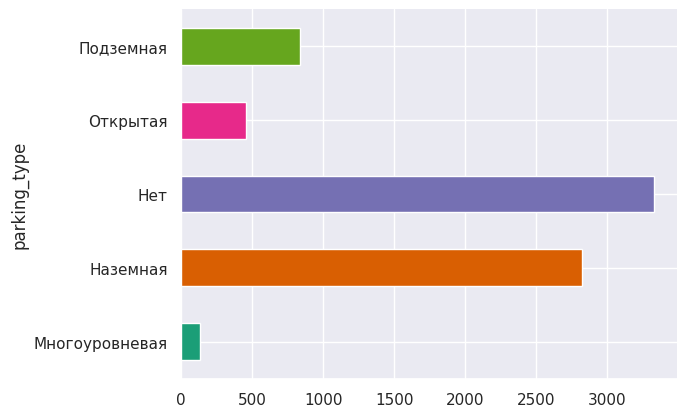

In [783]:
# @title parking_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('parking_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

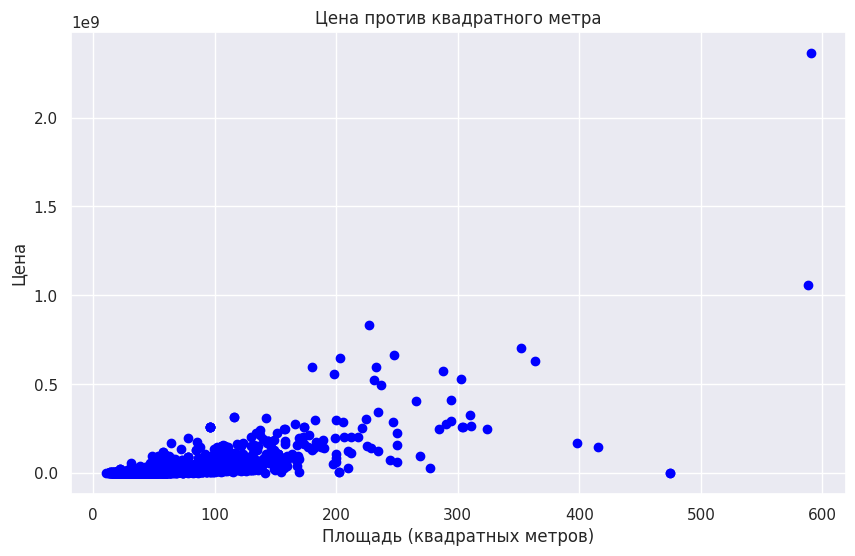

In [784]:


plt.figure(figsize=(10, 6))
plt.scatter(df['total_meters'], df['price'], color='blue', marker='o')

# Добавляем заголовки и метки осей
plt.title('Цена против квадратного метра')
plt.xlabel('Площадь (квадратных метров)')
plt.ylabel('Цена')

# Отображаем график
plt.show()

In [785]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,have_loggia,finish_type,living_meters,kitchen_meters,ceiling_height,price_meter
count,7562.000000,7562.000000,7562.000000,7562.000000,7.562000e+03,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7.562000e+03
mean,7.389447,13.955964,1.694129,51.394724,1.472923e+07,1643.508992,0.373182,-0.749405,21.261968,8.769836,1.832063,2.290804e+05
std,6.642077,9.159726,0.886609,30.083944,4.629940e+07,772.496014,0.601642,0.433384,17.903832,6.630532,1.506194,2.387959e+05
min,1.000000,1.000000,-1.000000,10.800000,8.300000e+05,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.010316e+04
25%,3.000000,7.000000,1.000000,35.000000,5.370457e+06,1966.000000,0.000000,-1.000000,10.400000,5.700000,0.000000,1.321224e+05
50%,5.000000,14.000000,2.000000,44.400000,7.800000e+06,2012.000000,0.000000,-1.000000,19.000000,8.400000,2.680000,1.677636e+05
75%,10.000000,18.000000,2.000000,60.000000,1.100000e+07,2023.000000,1.000000,0.000000,30.875000,11.700000,2.800000,2.210243e+05
max,82.000000,97.000000,5.000000,590.300000,2.361200e+09,2031.000000,4.000000,0.000000,300.000000,90.000000,52.000000,4.000000e+06


In [786]:
# df['total_meters'].describe()
# df['ceiling_height'].describe()
df['total_meters'].describe()

,total_meters
count,7562.000000
mean,51.394724
std,30.083944
min,10.800000
25%,35.000000
50%,44.400000
75%,60.000000
max,590.300000
